In [1]:
import stanza
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# UPOS Reference List

    ADJ: adjective
    ADP: adposition
    ADV: adverb
    AUX: auxiliary
    CCONJ: coordinating conjunction
    DET: determiner
    INTJ: interjection
    NOUN: noun
    NUM: numeral
    PART: particle
    PRON: pronoun
    PROPN: proper noun
    PUNCT: punctuation
    SCONJ: subordinating conjunction
    SYM: symbol
    VERB: verb
    X: other


# Setup Stanza NLP with Pre-trained English Language Model

In [2]:
print('Downloading English model...')
stanza.download('en')

2021-02-13 14:08:51 INFO: Downloading default packages for language: en (English)...
2021-02-13 14:08:52 INFO: File exists: /home/neon/stanza_resources/en/default.zip.
2021-02-13 14:08:55 INFO: Finished downloading models and saved to /home/neon/stanza_resources.


In [3]:
print('Building an English pipeline...')
en_nlp = stanza.Pipeline('en')

2021-02-13 14:08:55 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-13 14:08:55 INFO: Use device: cpu
2021-02-13 14:08:55 INFO: Loading: tokenize
2021-02-13 14:08:55 INFO: Loading: pos


Building an English pipeline...


2021-02-13 14:08:55 INFO: Loading: lemma
2021-02-13 14:08:55 INFO: Loading: depparse
2021-02-13 14:08:56 INFO: Loading: sentiment
2021-02-13 14:08:56 INFO: Loading: ner
2021-02-13 14:08:56 INFO: Done loading processors!


# Setup for Processing .txt Files into Pandas DataFrames

In [4]:
def get_hier(sent_no_str, sent_loc_ind):
    
    '''Input the index number of the sentence as a string, i.e. "Sentence 1",
    then give the sentence index location in the list of dicts, and include name for new df'''

    outside = [str(sent_no_str)]*len(sent_loc_ind)
    inside = list(range(len(sent_loc_ind)))
    hier_index = list(zip(outside,inside))
    multi_index = pd.MultiIndex.from_tuples(hier_index)
    
    df = pd.DataFrame(sent_loc_ind, index = multi_index)
    df.drop('id',axis=1,inplace=True)
    
    return df
    

In [5]:
class Section:
    
    def __init__(self, section):
        self.section = section
        self.sentences = len(section)
        self.indices = [num for num in range(0,self.sentences)]
        
    def get_hier(self,sent_no_str, sent_loc_ind):
    
        '''Input the index number of the sentence as a string, i.e. "Sentence 1",
        then give the sentence index location in the list of dicts, and include name for new df'''

        outside = [str(sent_no_str)]*len(self.section[sent_loc_ind])
        inside = list(range(len(self.section[sent_loc_ind])))
        hier_index = list(zip(outside,inside))
        multi_index = pd.MultiIndex.from_tuples(hier_index)
    
        df = pd.DataFrame(self.section[sent_loc_ind], index = multi_index)
        df.drop('id',axis=1,inplace=True)
    
        return df
    
    def frame_concat(self):

        df_list = []
    
        while len(df_list) < self.sentences:
    
            for i in self.indices:
    
                sent_no = f'Sent {self.indices[i]}'
                df_no = f'df {self.indices[i]}'
                df_no = self.get_hier(sent_no,self.indices[i])
                df_list.append(df_no)
            
        df = pd.concat(df_list)
    
        return df

# Nahuatl Section 19

In [6]:
with open('n19', 'r') as nineteen:
    n19 = en_nlp(nineteen.read())
    n19 = n19.to_dict()

In [7]:
n19s = Section(n19)

In [8]:
n19df = n19s.frame_concat()

# Spanish Section 19

In [9]:
with open('s19', 'r') as s19:
    s19 = en_nlp(s19.read())
    s19 = s19.to_dict()
    
s19s = Section(s19)
s19df = s19s.frame_concat()

# Nahuatl Section 20

In [10]:
with open('n20', 'r') as n20:
    n20 = en_nlp(n20.read())
    n20 = n20.to_dict()

In [11]:
n20s = Section(n20)

In [12]:
n20df = n20s.frame_concat()

# Spanish Section 20

In [13]:
with open('s20', 'r') as s20:
    s20 = en_nlp(s20.read())
    s20 = s20.to_dict()
    
s20s = Section(s20)
s20df = s20s.frame_concat()

# Nahuatl Section 21

In [14]:
with open('n21', 'r') as n21:
    n21 = en_nlp(n21.read())
    n21 = n21.to_dict()
    
n21s = Section(n21)
n21df = n21s.frame_concat()

# Spanish Section 21

In [15]:
with open('s21', 'r') as s21:
    s21 = en_nlp(s21.read())
    s21 = s21.to_dict()
    
s21s = Section(s21)
s21df = s21s.frame_concat()

# EDA

In [16]:
#Univ POSs for sentence one
n20df.loc[('Sent 1')]['upos'].value_counts()

NOUN     8
VERB     7
ADP      5
AUX      4
PUNCT    4
DET      4
ADV      2
SCONJ    2
CCONJ    2
PRON     1
Name: upos, dtype: int64

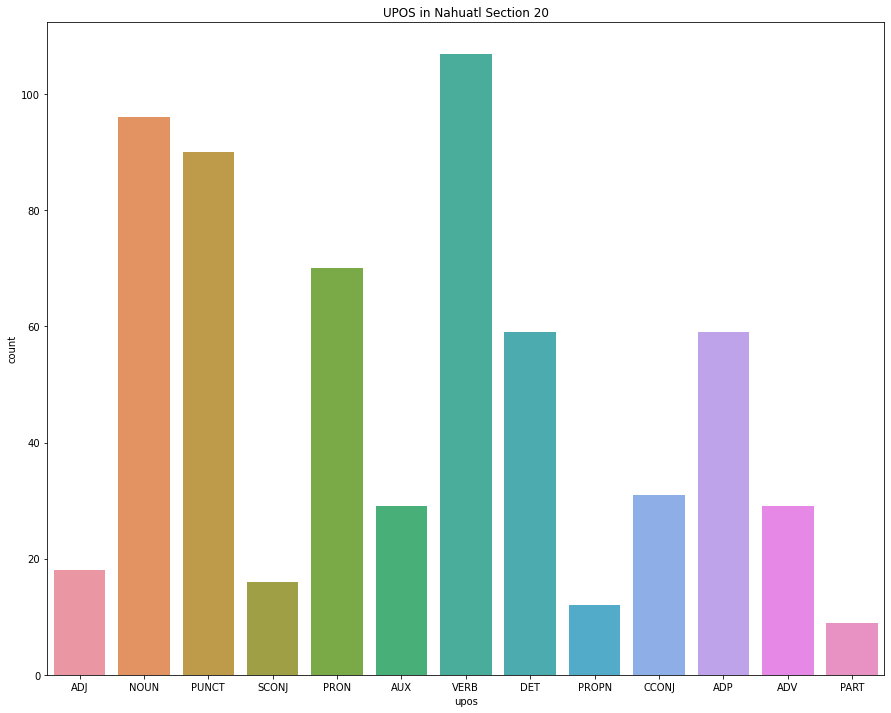

In [17]:
plt.figure(figsize=(15,12))
sns.countplot(x=n20df['upos'])
plt.title('UPOS in Nahuatl Section 20')
plt.savefig("s20.png",transparent=True)

In [18]:
def sent_length(section):
    
    sent_lengths = []
    for sent in section:
        sent_lengths.append(len(sent))
    return sent_lengths

In [19]:
n = sent_length(n20)
#n

In [20]:
#Average sentence length
sum(n)/len(n)

20.161290322580644

In [21]:
#Percentage of UPOS used in Nahuatl Section 20
n20_pos = 100 * n20df['upos'].value_counts()/n20df['upos'].value_counts().sum()
n20_pos

VERB     17.12
NOUN     15.36
PUNCT    14.40
PRON     11.20
ADP       9.44
DET       9.44
CCONJ     4.96
AUX       4.64
ADV       4.64
ADJ       2.88
SCONJ     2.56
PROPN     1.92
PART      1.44
Name: upos, dtype: float64

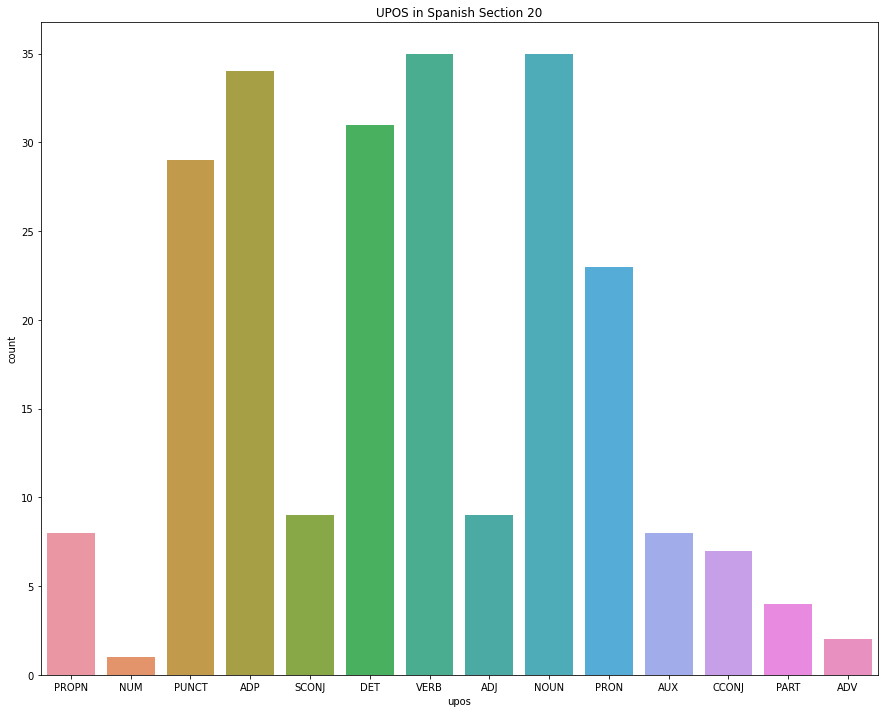

In [22]:
s20df.loc[('Sent 1')]['upos'].value_counts()

plt.figure(figsize=(15,12))
sns.countplot(x=s20df['upos'])
plt.title('UPOS in Spanish Section 20')
plt.savefig("s20.png",transparent=True)

In [23]:
#Percentage of UPOS used in Spanish Section 20
s20_pos = 100 * s20df['upos'].value_counts()/s20df['upos'].value_counts().sum()
s20_pos

NOUN     14.893617
VERB     14.893617
ADP      14.468085
DET      13.191489
PUNCT    12.340426
PRON      9.787234
SCONJ     3.829787
ADJ       3.829787
AUX       3.404255
PROPN     3.404255
CCONJ     2.978723
PART      1.702128
ADV       0.851064
NUM       0.425532
Name: upos, dtype: float64

In [24]:
def sent_length(section):
    
    sent_lengths = []
    for sent in section:
        sent_lengths.append(len(sent))
    return sent_lengths

d = sent_length(s20)
d

[30, 34, 16, 14, 14, 11, 6, 17, 11, 16, 15, 23, 4, 24]

In [25]:
#Average sentence length for s20
sum(d)/len(d)

16.785714285714285

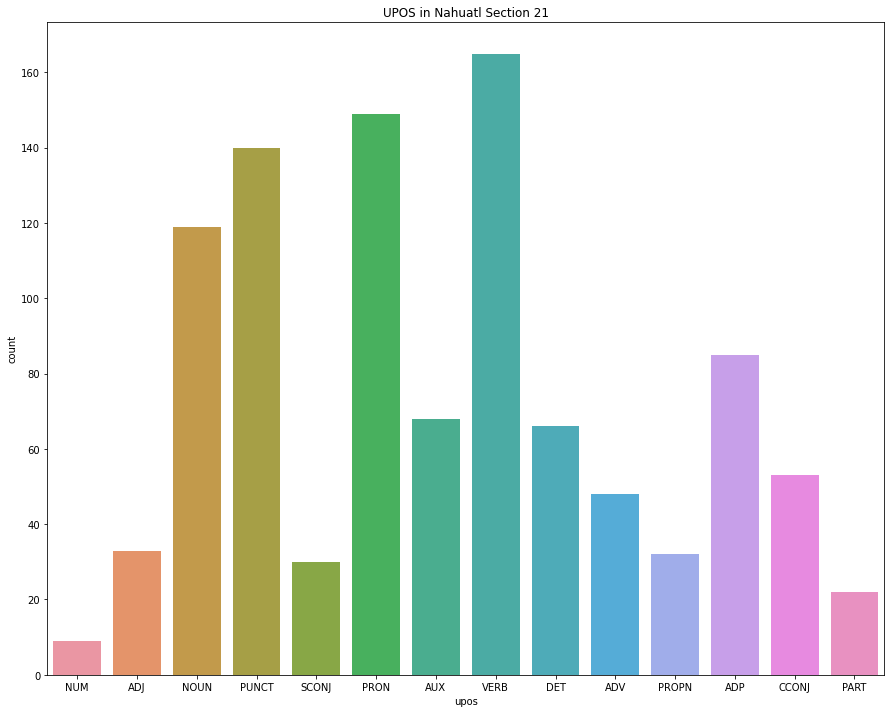

In [26]:
n21df.loc[('Sent 1')]['upos'].value_counts()

plt.figure(figsize=(15,12))
sns.countplot(x=n21df['upos'])
plt.title('UPOS in Nahuatl Section 21')
plt.savefig("n21.png",transparent=True)

In [27]:
#Percentage of UPOS used in Nahuatl Section 21
n21_pos = 100 * n21df['upos'].value_counts()/n21df['upos'].value_counts().sum()
n21_pos

VERB     16.192345
PRON     14.622179
PUNCT    13.738960
NOUN     11.678116
ADP       8.341511
AUX       6.673209
DET       6.476938
CCONJ     5.201178
ADV       4.710500
ADJ       3.238469
PROPN     3.140334
SCONJ     2.944063
PART      2.158979
NUM       0.883219
Name: upos, dtype: float64

In [28]:
def sent_length(section):
    
    sent_lengths = []
    for sent in section:
        sent_lengths.append(len(sent))
    return sent_lengths

e = sent_length(n21)
#e

In [29]:
#Average sentence length for n21
sum(e)/len(e)

21.229166666666668

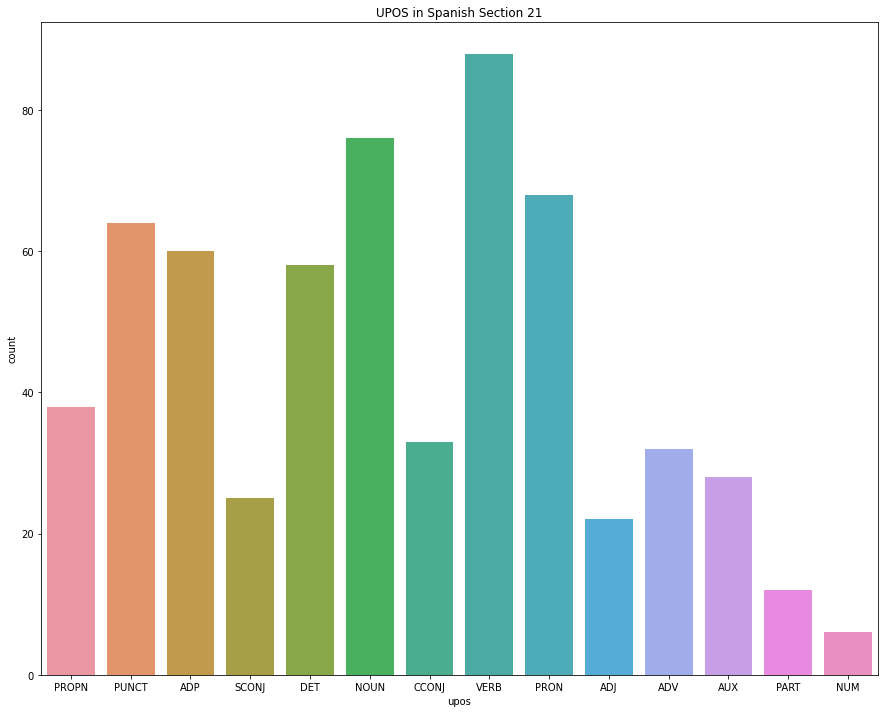

In [30]:
s21df.loc[('Sent 1')]['upos'].value_counts()

plt.figure(figsize=(15,12))
sns.countplot(x=s21df['upos'])
plt.title('UPOS in Spanish Section 21')
plt.savefig("s21.png",transparent=True)

In [31]:
#Percentage of UPOS used in Spanish Section 21
s21_pos = 100 * s21df['upos'].value_counts()/s21df['upos'].value_counts().sum()
s21_pos

VERB     14.426230
NOUN     12.459016
PRON     11.147541
PUNCT    10.491803
ADP       9.836066
DET       9.508197
PROPN     6.229508
CCONJ     5.409836
ADV       5.245902
AUX       4.590164
SCONJ     4.098361
ADJ       3.606557
PART      1.967213
NUM       0.983607
Name: upos, dtype: float64

In [32]:
def sent_length(section):
    
    sent_lengths = []
    for sent in section:
        sent_lengths.append(len(sent))
    return sent_lengths

f = sent_length(s21)
#f

In [33]:
#Average sentence length for s21
sum(f)/len(f)

26.52173913043478

In [34]:
pos = {'n20':n20_pos,'s20':s20_pos,'n21':n21_pos,'s21':s21_pos} #Dictionary out of percentages of used UPOS in each section
posdf = pd.DataFrame(pos) #Dataframe of that ish

In [35]:
posdf

,n20,s20,n21,s21
ADJ,2.88,3.829787,3.238469,3.606557
ADP,9.44,14.468085,8.341511,9.836066
ADV,4.64,0.851064,4.710500,5.245902
AUX,4.64,3.404255,6.673209,4.590164
CCONJ,4.96,2.978723,5.201178,5.409836
DET,9.44,13.191489,6.476938,9.508197
NOUN,15.36,14.893617,11.678116,12.459016
NUM,NaN,0.425532,0.883219,0.983607
PART,1.44,1.702128,2.158979,1.967213
PRON,11.20,9.787234,14.622179,11.147541


In [36]:
index=['ADJ','ADP','ADV','AUX','CCONJ','DET','NOUN','NUM','PART','PRON','PROPN','PUNCT','SCONJ','VERB']

In [37]:
posdf.index

Index(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'NUM', 'PART',
       'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'VERB'],
      dtype='object')

<AxesSubplot:title={'center':'Use of UPOS by translation and section as a %'}>

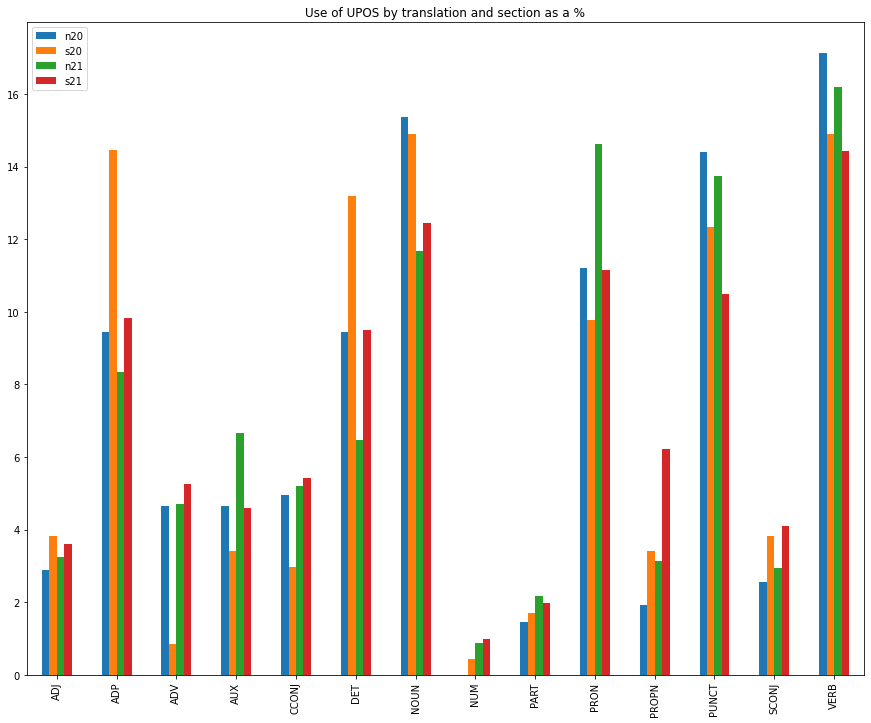

In [38]:
posdf.plot(kind='bar',figsize=(15,12),title='Use of UPOS by translation and section as a %')

<AxesSubplot:>

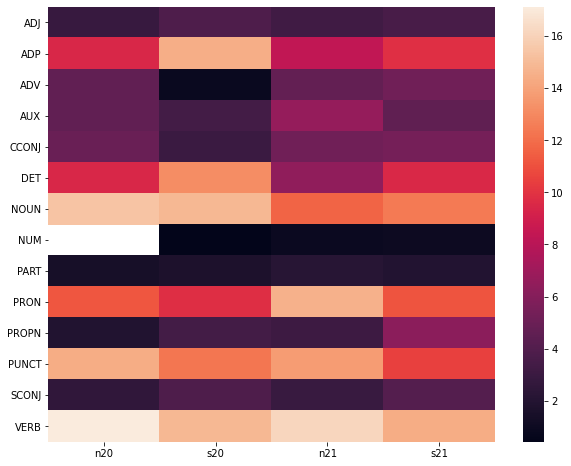

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(posdf)